<h1 align='center'>
<span style='color:navy'>
<b>
NLP - SPAM SMS DETECTION
</b>
</span>
</h1>

<br>

## **| Process**

1. Load dataset
2. Data Visualization
3. Data Preprocessing
4. Model selection
5. Training
6. Evaluation and Results Visualization

<br>
<h2 align='center'>
<span style='background:black; color:blue'>
<b>
1 | Load dataset
<b>
</span>
</h2>

In [1]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('train.csv').rename(columns={'sms': 'text'})

df.head(3)

text  label
0  Go until jurong point, crazy.. Available only ...      0
1                    Ok lar... Joking wif u oni...\n      0
2  Free entry in 2 a wkly comp to win FA Cup fina...      1

In [3]:
df.shape

(5574, 2)

<br>
<h2 align='center'>
<span style='background:black; color:blue'>
<b>
2 | Data Visualization
<b>
</span>
</h2>

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# set font for ploting
font = {'fontsize': 16,
        'fontstyle': 'italic',
        'backgroundcolor': 'black',
        'color': 'white'}

%matplotlib inline

plt.style.use('_mpl-gallery')
plt.style.use('seaborn-v0_8')

<br>

<span style='color: blue'>
Label Distribution and Text Length Distribution plot:
</span>

In [5]:
# Calculate the len of each text
df['text_length'] = df['text'].apply(lambda x: len(x.split()))  

df.head(3)

text  label  text_length
0  Go until jurong point, crazy.. Available only ...      0           20
1                    Ok lar... Joking wif u oni...\n      0            6
2  Free entry in 2 a wkly comp to win FA Cup fina...      1           28

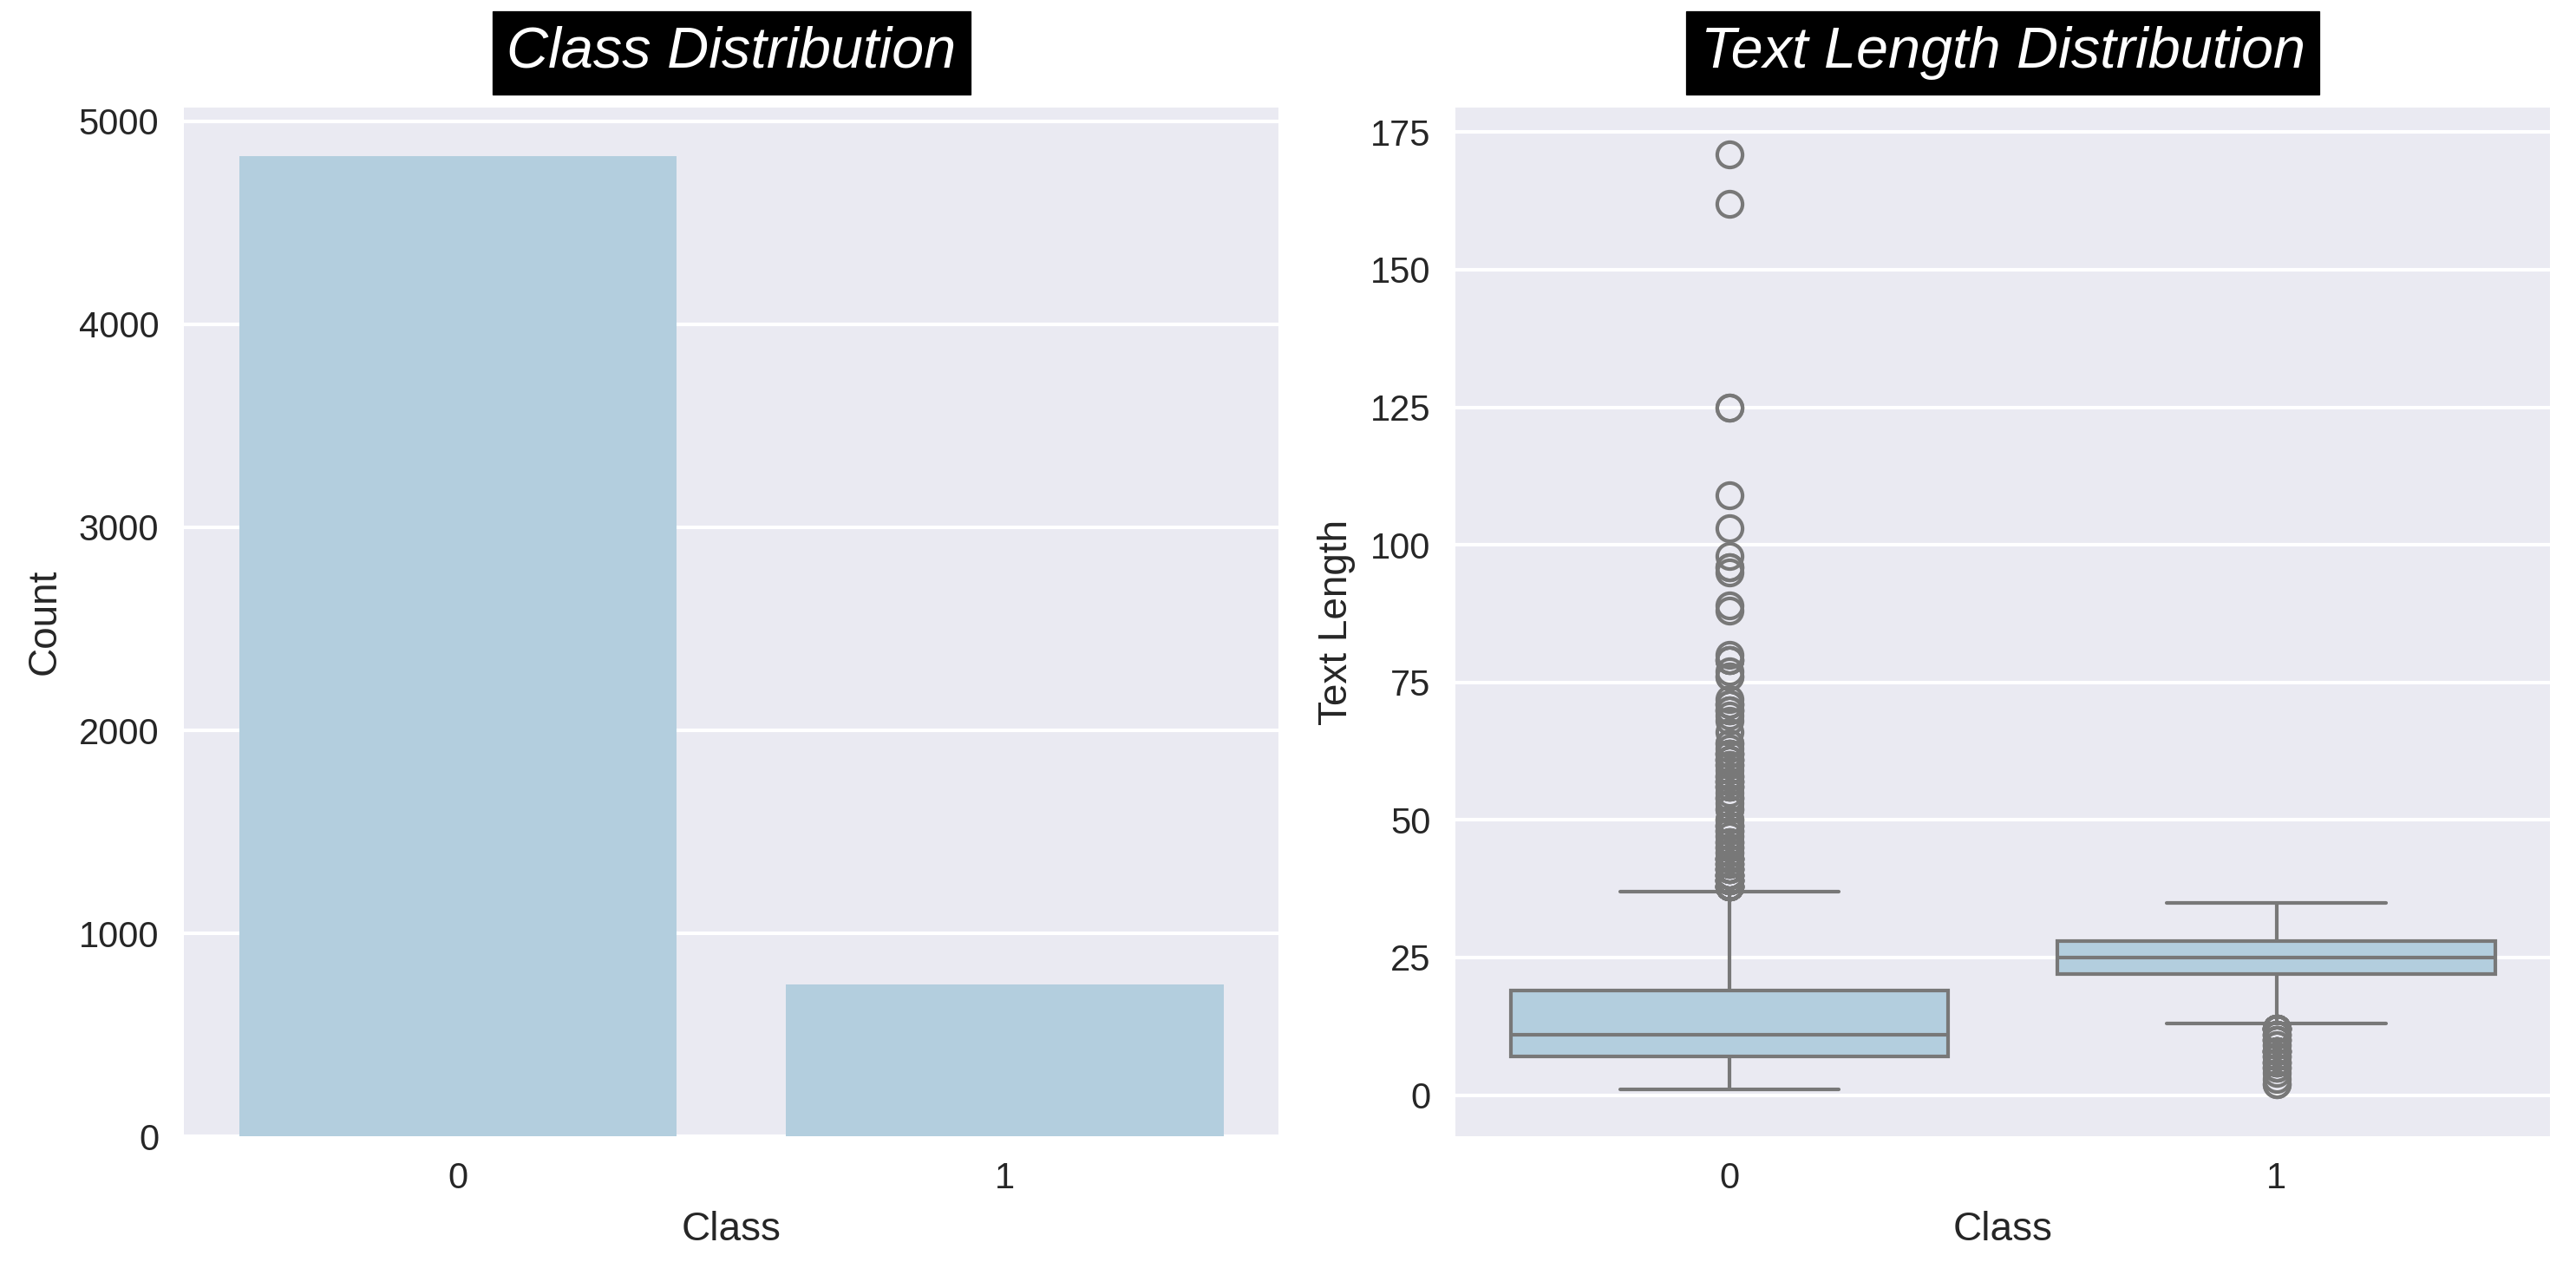

In [7]:
plt.figure(figsize=(10, 5), dpi=300)
color = sns.color_palette('Blues', 2)

# Countplot
ax1 = plt.subplot(1, 2, 1)
sns.set_palette(color)
sns.countplot(x='label', data=df)
ax1.set_title('Class Distribution', fontdict=font, pad=11)
plt.xlabel('Class')
plt.ylabel('Count')

# Boxplot
ax2 = plt.subplot(1, 2, 2)
sns.set_palette(color)
sns.boxplot(x='label', y='text_length', data=df)
ax2.set_title('Text Length Distribution', fontdict=font, pad=11)
plt.xlabel('Class')
plt.ylabel('Text Length')

plt.tight_layout()
plt.show()

<br>

<span style='color: blue'>
Text Length Distribution with KDE:
</span>

<Figure size 2400x1500 with 0 Axes>

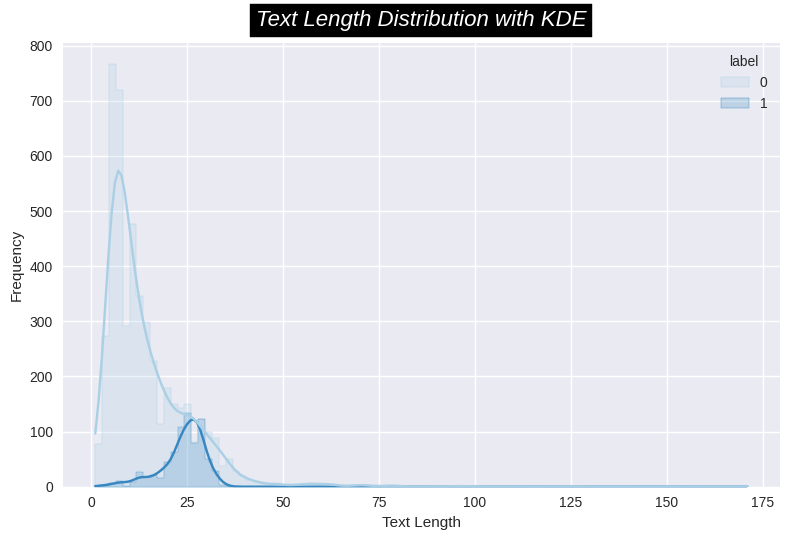

In [9]:
plt.figure(figsize=(8, 5), dpi=300)

fig, ax = plt.subplots()
sns.set_palette(color)
sns.histplot(data=df, x='text_length', hue='label',
             kde=True, element='step')
ax.set_title('Text Length Distribution with KDE', fontdict=font, pad=12)
plt.xlabel('Text Length')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

<i>
This graph provides a visual representation of the text message length distribution for both 'spam' and 'ham' messages.

By analysis, we can observe that the majority of 'ham' SMS messages (`label = 0` in this graph) have a text length of less than 10. This observation suggests that most valid messages are relatively short, which is consistent with the typical communication patterns in normal communication text messages.
</i>

<br>

<span style='color: blue'>
Word Cloud for two labels:
</span>

In [10]:
from wordcloud import WordCloud

In [11]:
df.columns

Index(['text', 'label', 'text_length'], dtype='object')

In [12]:
colors = sns.color_palette('Blues', as_cmap=True)

ham_txt = " ".join(df[df['label'] == 0]['text'])
spam_txt = " ".join(df[df['label'] == 1]['text'])

ham_wc = WordCloud(width=800, height=800,
                   background_color='white',
                   colormap=colors).generate(ham_txt)
spam_wc = WordCloud(width=800, height=800,
                    background_color='white',
                    colormap=colors).generate(spam_txt)

ham_img = ham_wc.to_array()
spam_img = spam_wc.to_array()

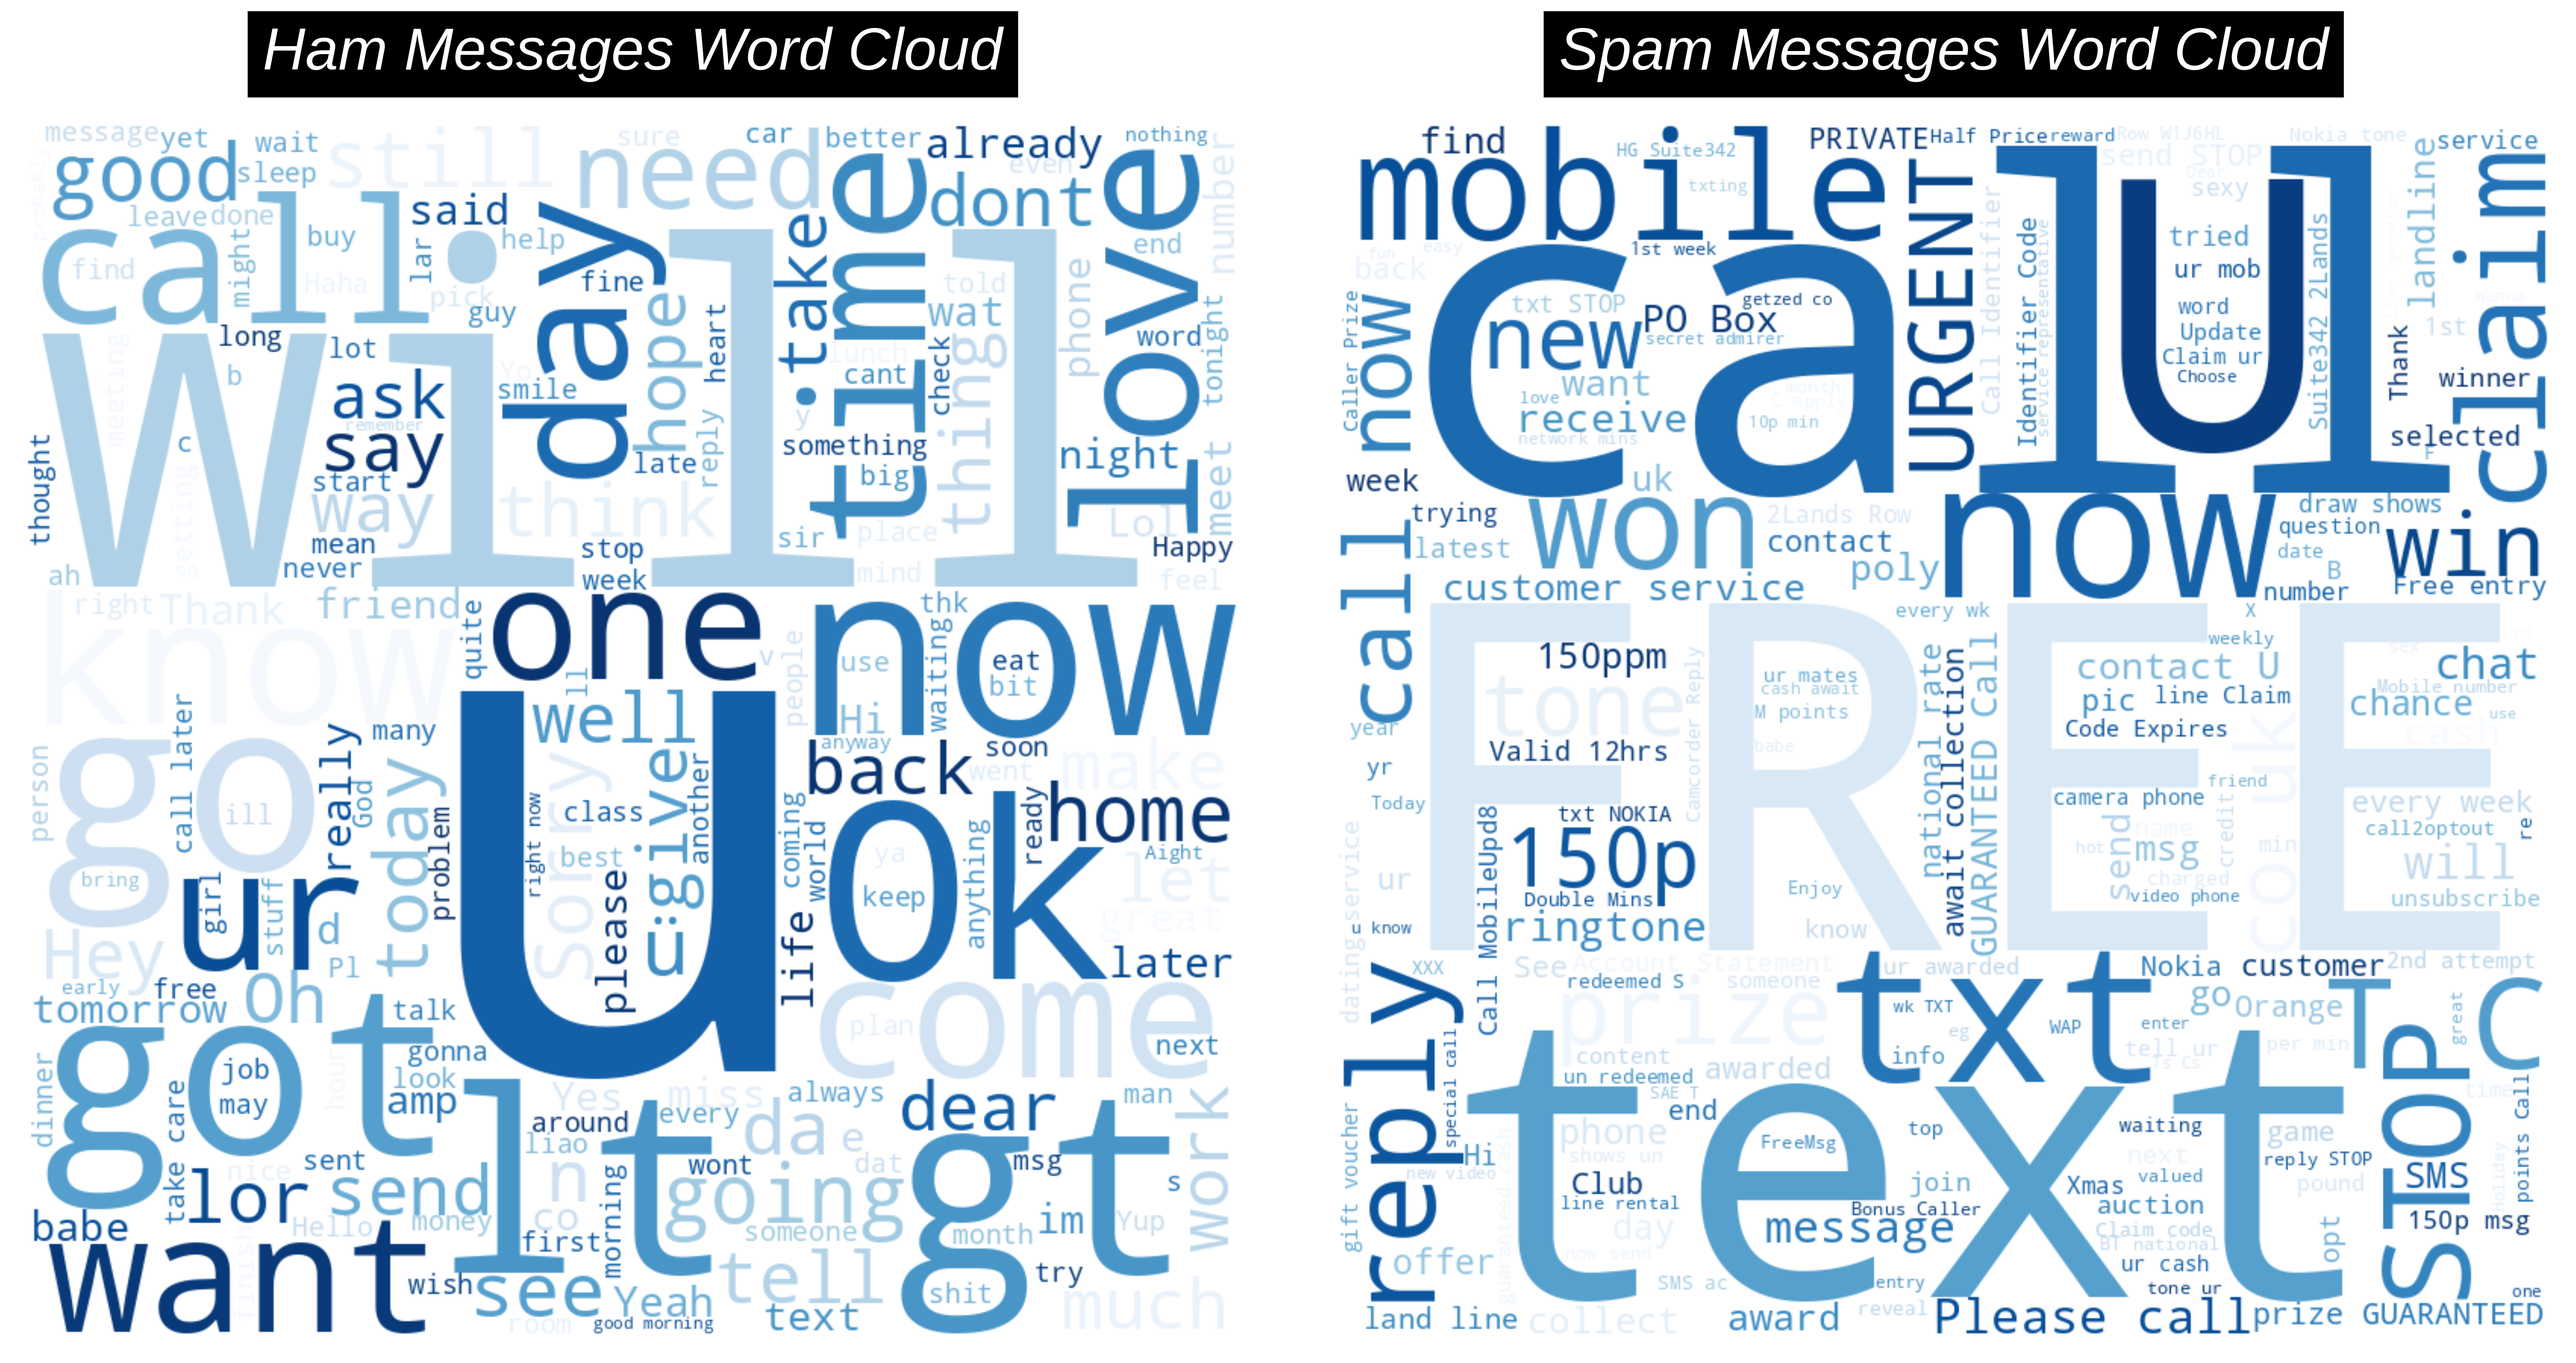

In [13]:
plt.figure(figsize=(10, 5), dpi=600)

# Ham image
ax1 = plt.subplot(1, 2, 1)
plt.imshow(ham_img, interpolation='bilinear')
ax1.set_title('Ham Messages Word Cloud', fontdict=font, pad=15)
plt.axis('off')

# Spam image
ax2 = plt.subplot(1, 2, 2)
plt.imshow(spam_img, interpolation='bilinear')
ax2.set_title('Spam Messages Word Cloud', fontdict=font, pad=15)
plt.axis('off')

plt.tight_layout()
plt.show()

<br>
<h2 align='center'>
<span style='background:black; color:blue'>
<b>
3 | Text Preprocessing
<b>
</span>
</h2>

Text preprocessing is an essential step in natural language processing, that involves cleaning and transforming raw text data into a format suitable for analysis. In the provided code snippet, we perform the following preprocessing steps below:
1. <span style='color: blue'><b>Tokenization:</b></span> We tokenize the text into individual words, splitting it based on spaces and punctuation marks.
2. <span style='color: blue'><b>Lowercasing:</b></span> All words are converted to lowercase to ensure consistent comparison and analysis.
3. <span style='color: blue'><b>Stopword Removal:</b></span> We eliminate common words (stopwords) that do not contribute significantly to the meaning of the text.

The processed words are then joined back together to from preprocessed text. This preprocessing is performed using the `word_tokenize` function from the Natural Language Toolkit (NLTK) library and the stopwords list provided by NLTK.

<span style='color: blue'>
By applying these preprocessing techniques, we create a cleaner and more manageable text dataset for further analysis and modeling. This process enhances the quality of text-based tasks such as <b>classification, sentiment analysis and topic modeling</b>.
</span>

In [14]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ttnghii/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
def preprocess_text(text):
    words = word_tokenize(text)  # Tokenization
    words = [word.lower() for word in words if word.isalnum()]  # Lowercase 
    words = [word for word in words if word not in stopwords.words("english")]  # Remove stopwords
    return " ".join(words)  # Concate tokens

In [16]:
df['text'] = df['text'].apply(preprocess_text)

df.head(3)

text  label  text_length
0  go jurong point crazy available bugis n great ...      0           20
1                            ok lar joking wif u oni      0            6
2  free entry 2 wkly comp win fa cup final tkts 2...      1           28

<br>
<h2 align='center'>
<span style='background:black; color:blue'>
<b>
4 | Model Selection
<b>
</span>
</h2>

<span style='color: blue'>TF-IDF Vectorization and Multinomial Naive Bayes Classification:</span> Now we present the TF-IDF (Term Frequency-Inverse Document Frequency) vectorization process followed by classification using Multinomial Naive Bayes algorithm:
1. <span style='color: blue'><b>TF-IDF Vectorization:</b></span> We use `TfidfVectorizer` from Scikit-learn library to <b>convert the text data into a numerical format</b> suitable for machine learning. The `max_features` parameter limits the number of unique words and the `ngram_range` parameter specifies the range of n-grams (word combinations).
2. <span style='color: blue'><b>Train-Test split:</b></span> The dataset is split into training and testing sets using the `train_test_split` function. This division allows us to evaluate the model's performance on unseen data.
3. <span style='color: blue'><b>Multinomial Naive Bayes Classification:</b></span> We create an instance of the `MultinomialNB` classifier and train it on the training data. The `alpha` parameter controls the smoothing effect of the algorithm.

<span style='color: blue'>
By combining TF-IDF vectorization with the Multinomial Naive Bayes algorithm, we build a text classification model capable of distinguishing between different classes based on their textual content.
</span>

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [18]:
tfidf_vectorizer = TfidfVectorizer(max_features=1000, ngram_range=(1, 2))

X = tfidf_vectorizer.fit_transform(df['text']).toarray()
y = df['label']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

print(f'The X_train shape: {X_train.shape}')
print(f'The X_test shape: {X_test.shape}')
print(f'The y_train shape: {y_train.shape}')
print(f'The y_test shape: {y_test.shape}')                                                                                      

The X_train shape: (4459, 1000)
The X_test shape: (1115, 1000)
The y_train shape: (4459,)
The y_test shape: (1115,)


<br>
<h3 align='center'>
<span style='background:lightblue; color:navy'>
<b>
Find the best parameter
</b>
</span>
</b>

In [32]:
from sklearn.model_selection import GridSearchCV

def choose_params(model, param, X=X_train, y=y_train):
    
    model_ = GridSearchCV(
        model,
        param_grid=param,
        cv=5,
        scoring='accuracy'
    ).fit(X, y)

    return model_.best_params_

<br>
<h2 align='center'>
<span style='background:black; color:blue'>
<b>
5 | Training
<b>
</span>
</h2>

Build Multinomial Naive Bayes model:

In [22]:
from sklearn.naive_bayes import MultinomialNB

In [33]:
def MultinomialNB_best_params(X=X_train, y=y_train):

    params_ = {'alpha': [1, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5]}

    return choose_params(model=MultinomialNB(), param=params_)

print(MultinomialNB_best_params())

{'alpha': 0.1}


In [23]:
model = MultinomialNB(alpha=0.1)
model.fit(X=X_train, y=y_train)

MultinomialNB(alpha=0.1)

<br>
<h3 align='center'>
<span style='background:lightblue; color:navy'>
<b>
NLTK Classifier Wrapper
</b>
</span>
</b> 

The code below defines a custom NLTK classifier wrapper that adapts a scikit-learn classifier for use within the NLTK library:

<span style='color: blue'><b>SklearnNTLKClassifier Class:</b></span>
- <code><span style='color: blue'>__init__(self, classifier):</span></code> Constructor that initializes the wrapper with a scikit-learn classifier.
- <code><span style='color: blue'>classify(self, features):</span></code> Method that predicts the class label for a single feature and returns the result.
- <code><span style='color: blue'>classify_many(self, featuresets):</span></code> Method that predicts class labels for multiple featuresets and returns the results.
- <code><span style='color: blue'>prob_classify(self, features):</span></code> Method that raises a `NotImplementedError`, indicating that probability estimation is not available.
- <code><span style='color: blue'>labels(self):</span></code> Method that retrieves the class labels from the underlying scikit-learn classifier.

The custom NLTK classifier wrapper is instantiated using the provied scikit-learn classifier, creating an adapter that enables the scikit-learn classifier to be used seamlessly within NLTK-based workflows.

In [24]:
class SklearnNLTKClassifier(nltk.classify.ClassifierI): # Constructor
    def __init__(self, classifier):
        self._classifier = classifier
    
    def classify(self, features):  # Predict for one feature
        return self._classifier.predict([features])[0]
    
    def classify_many(self, featuresets): # Predict for multiple features
        return self._classifier.predict(featuresets)
    
    def prob_classify(self, features): # Shows error for not implementating
        raise NotImplementedError("Probability estimation not available.")
    
    def labels(self): # Return labels
        return self._classifier.classes_ 

In [25]:
nltk_model = SklearnNLTKClassifier(model)

<br>
<h2 align='center'>
<span style='background:black; color:blue'>
<b>
6 | Apply model and Evaluation
<b>
</span>
</h2>

<br>
<span style='color: blue'>Prediction for Test data:</span>

In [26]:
y_pred = nltk_model.classify_many(X_test)

<br>
<span style='color: blue'>Evaluation:</span>

In [27]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix

We choose the main score is Accuracy.

In [64]:
accuracy = accuracy_score(y_test, y_pred)
acc = f'Accuracy: {accuracy:.2f}'
print(acc)

report = classification_report(y_test, y_pred)

Accuracy: 0.97


**Classification report:**

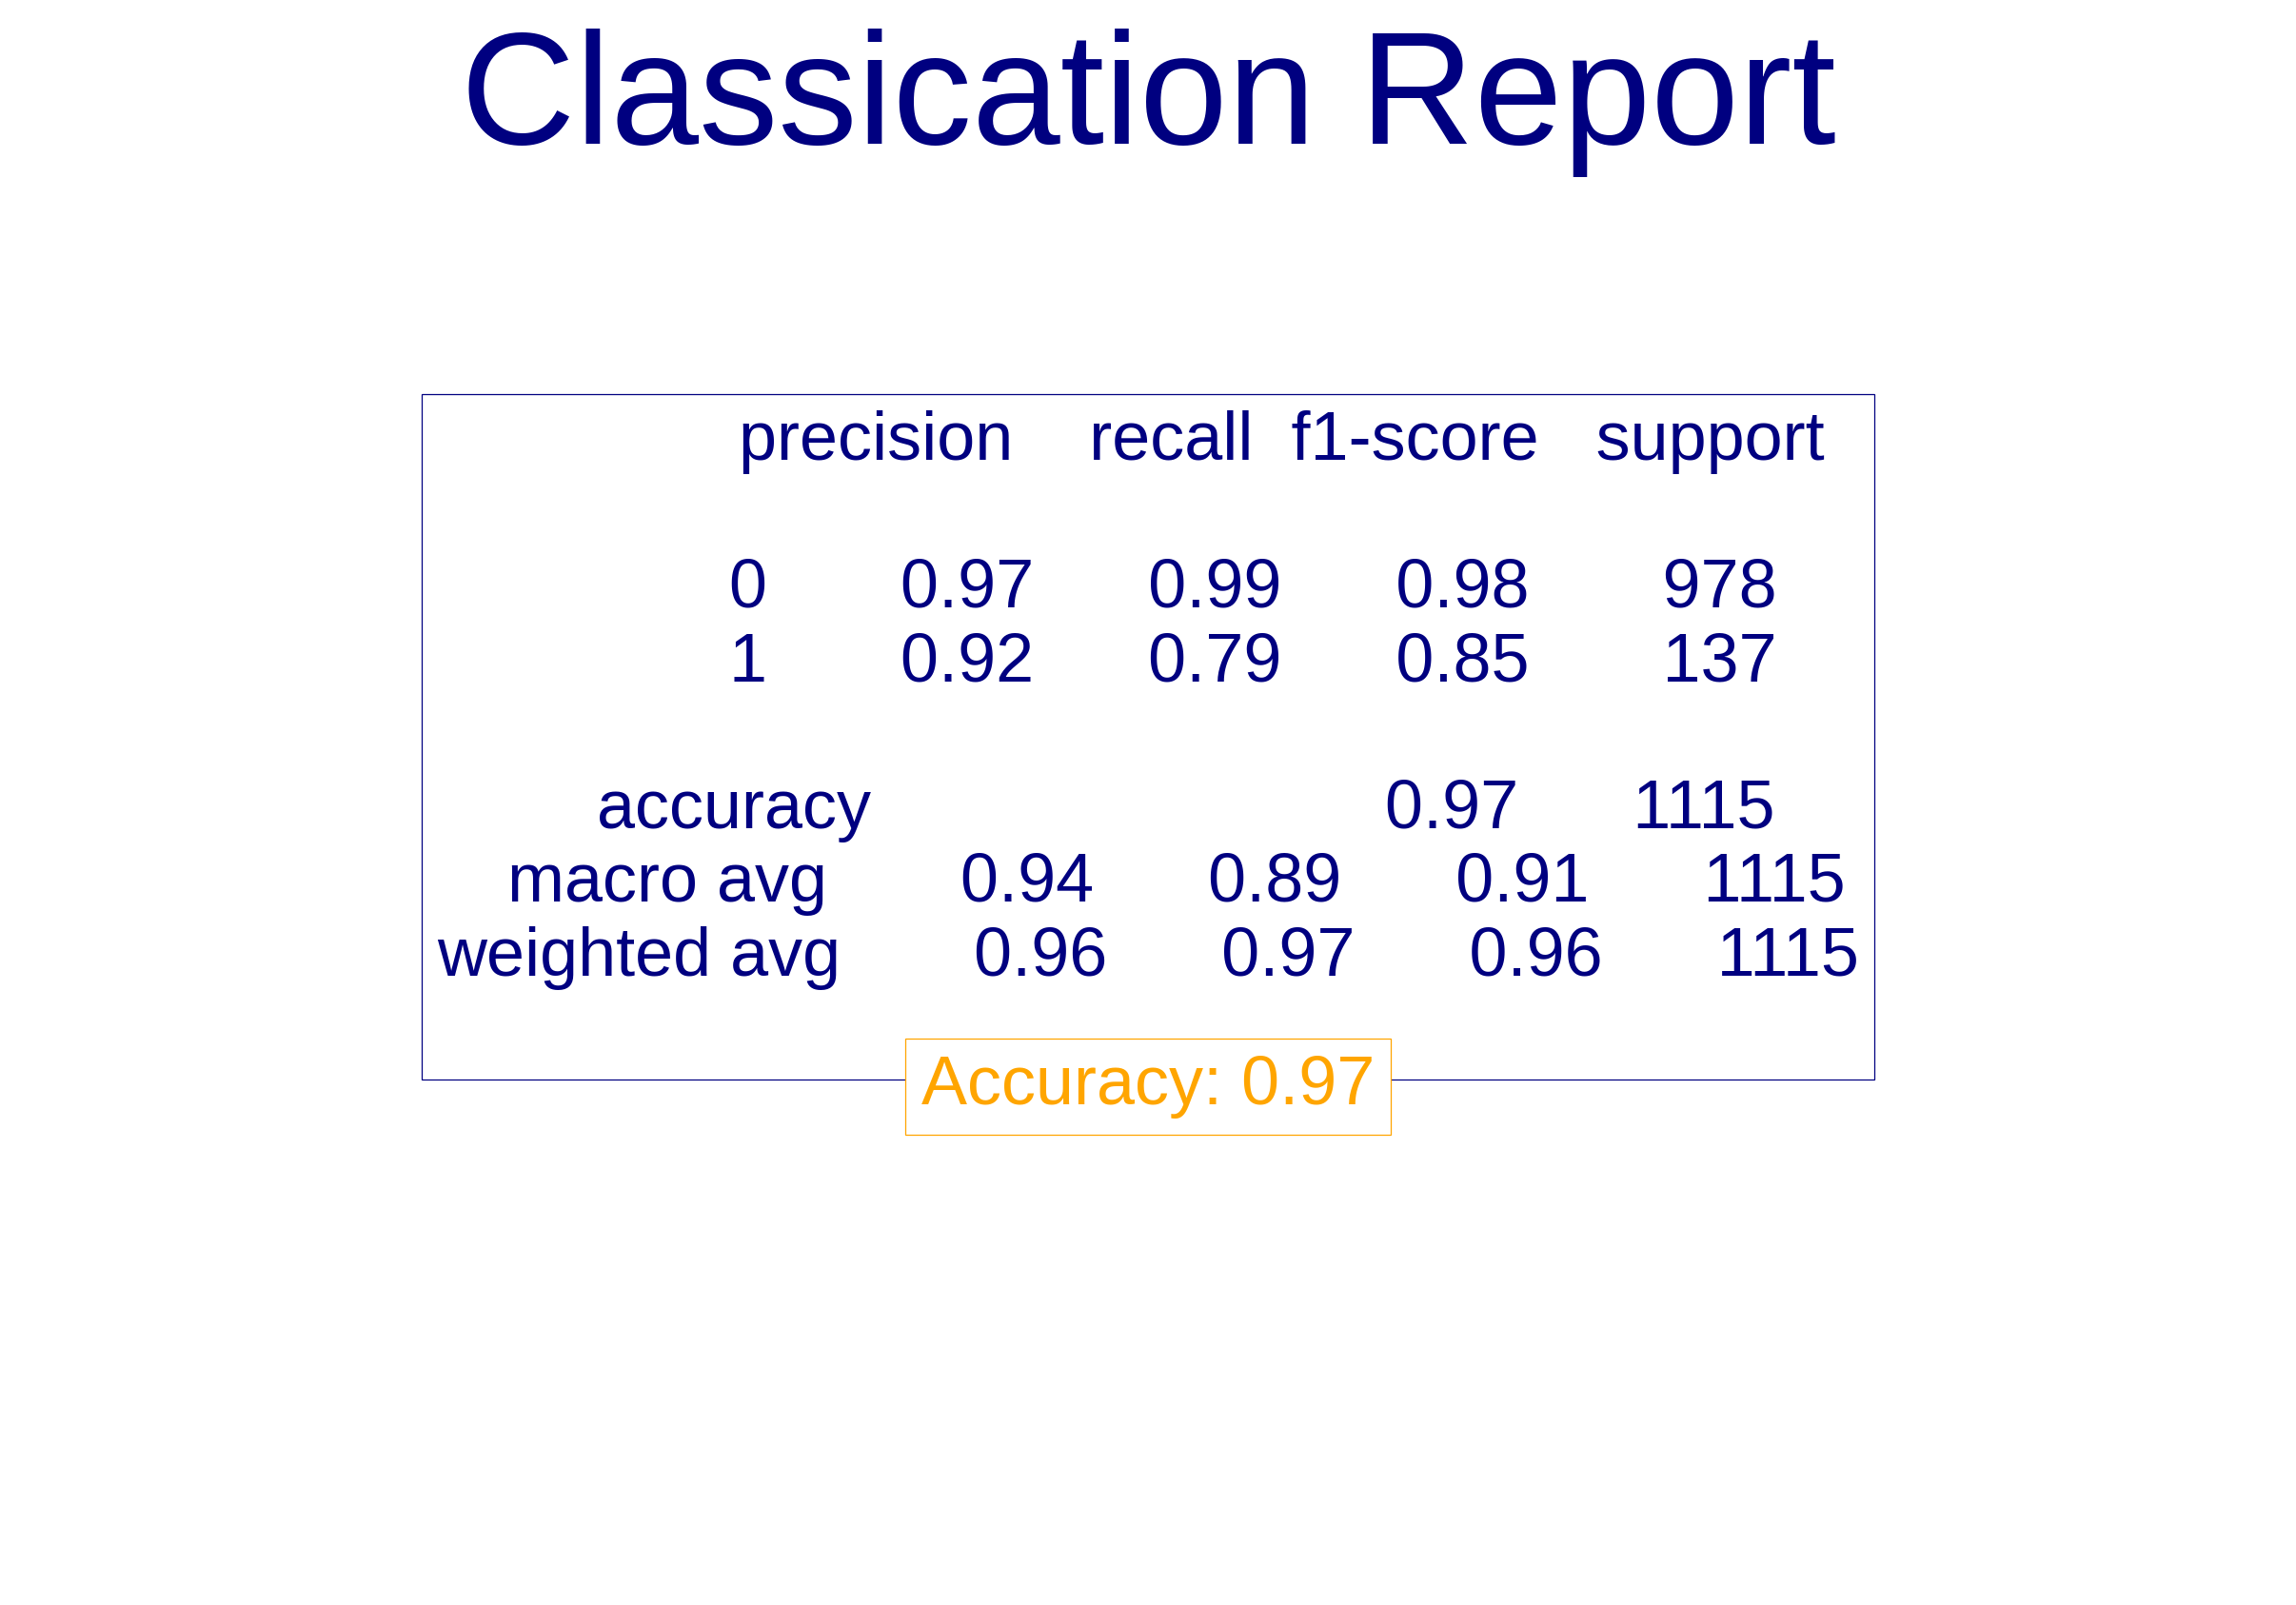

In [72]:
plt.figure(figsize=(8, 5), dpi=300)

plt.text(0.5, 0.6, report, fontsize='xx-large',
         color='navy', ha='center', va='center',
         bbox=dict(facecolor='white',
                   edgecolor='navy'))

plt.text(0.5, 0.35, acc, fontsize='xx-large',
         color='orange', ha='center', va='center',
         bbox=dict(facecolor='white',
                   edgecolor='orange'))

plt.title(label='Classication Report',
          fontsize=40,
          color='navy')
plt.axis('off')
plt.show()

**Confusion matrix:**

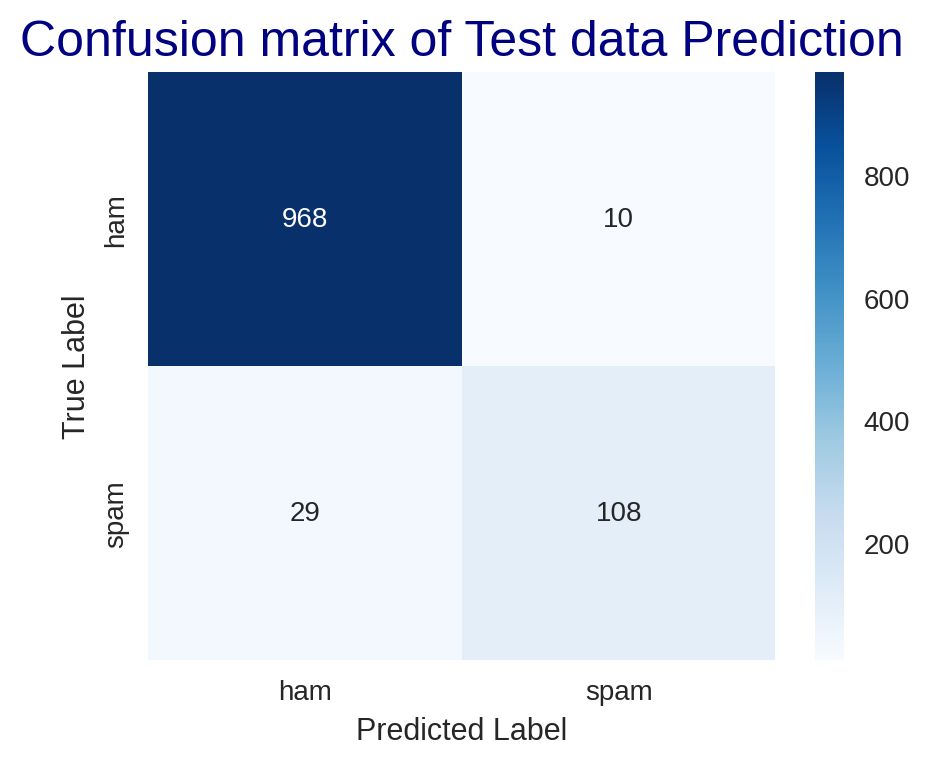

In [62]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4, 3), dpi=200)
sns.heatmap(conf_matrix, annot=True, 
            fmt='d', cmap='Blues', 
            xticklabels=['ham', 'spam'], 
            yticklabels=['ham', 'spam'])

plt.title(label='Confusion matrix of Test data Prediction',
          fontsize=18,
          color='navy')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.show()

<br>

## **| Conclusion**

<center>
<div class='alert alert-info' role='alert'>
We successfully developed a simple Spam SMS Classification model with an accuracy rate is 97%. This high score signifies our model's can correctly classify incoming messages.
</div>
</center>